In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from timm import create_model
from tqdm import tqdm

In [2]:
# Hyperparameters
batch_size = 32
num_epochs = 20
num_classes = 2

In [3]:
import os
import random
from sklearn.model_selection import train_test_split
# Set random seed
torch.manual_seed(42)
np.random.seed(42)
torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True

In [4]:
#dataset_path
dataset_path = "C:/Users/lamim/Desktop/N_Thesis/split_dataset3"
train_path = "C:/Users/lamim/Desktop/N_Thesis/split_dataset3/train"
val_path = "C:/Users/lamim/Desktop/N_Thesis/split_dataset3/val"


In [5]:
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
# Load dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size expected by the model
    transforms.ToTensor(),          # Convert to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize using ImageNet stats
])

train_data = datasets.ImageFolder(root=train_path, transform=transform)
val_data = datasets.ImageFolder(root=val_path, transform=transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import timm
import matplotlib.pyplot as plt
from tqdm import tqdm  # shows progress bars during training

# Load a pretrained model
model = timm.create_model("tnt_s_patch16_224", pretrained=True)

# Replace the classification head with our own
# Dropout helps reduce overfitting, and we set the output layer to match our number of classes
model.head = nn.Sequential(
    nn.Dropout(p=0.3),
    nn.Linear(model.head.in_features, num_classes)
)

# Use GPU if available — otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Standard loss for classification tasks
criterion = nn.CrossEntropyLoss()

# Adam optimizer tends to work well for vision transformers
optimizer = optim.Adam(model.parameters(), lr=0.001)

# We'll use these to keep track of how the model is doing each epoch
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Start training loop
for epoch in range(num_epochs):
    model.train()  # put model in training mode
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    # loop through the training data
    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # reset gradients

        outputs = model(inputs)  # forward pass
        loss = criterion(outputs, labels)  # calculate loss
        loss.backward()  # backpropagation
        optimizer.step()  # update model weights

        running_loss += loss.item()  # accumulate loss
        _, preds = torch.max(outputs, 1)  # get the class with highest score
        correct_preds += (preds == labels).sum().item()
        total_preds += labels.size(0)

    # calculate and store average loss and accuracy for this epoch
    train_loss = running_loss / len(train_loader)
    train_acc = correct_preds / total_preds
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")

    # now do the same for validation
    model.eval()  # switch to eval mode (turns off dropout, etc.)
    val_loss = 0.0
    correct_preds = 0
    total_preds = 0

    with torch.no_grad():  # no need to compute gradients here
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_preds += (preds == labels).sum().item()
            total_preds += labels.size(0)

    val_loss /= len(val_loader)
    val_acc = correct_preds / total_preds
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Validation Acc: {val_acc:.4f}, Validation Loss: {val_loss:.4f}")


100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [02:49<00:00,  1.55it/s]


Epoch 1/20, Train Loss: 0.7204, Train Acc: 0.5470
Validation Acc: 0.5045, Validation Loss: 0.6923


100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [02:39<00:00,  1.65it/s]


Epoch 2/20, Train Loss: 0.6341, Train Acc: 0.6289
Validation Acc: 0.6375, Validation Loss: 0.6586


100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [02:35<00:00,  1.69it/s]


Epoch 3/20, Train Loss: 0.5420, Train Acc: 0.7203
Validation Acc: 0.7089, Validation Loss: 0.5889


100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [02:43<00:00,  1.60it/s]


Epoch 4/20, Train Loss: 0.4561, Train Acc: 0.7923
Validation Acc: 0.7080, Validation Loss: 0.5600


100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [02:36<00:00,  1.68it/s]


Epoch 5/20, Train Loss: 0.4005, Train Acc: 0.8226
Validation Acc: 0.7804, Validation Loss: 0.4995


100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [02:40<00:00,  1.64it/s]


Epoch 6/20, Train Loss: 0.3443, Train Acc: 0.8526
Validation Acc: 0.8370, Validation Loss: 0.4534


100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [02:42<00:00,  1.62it/s]


Epoch 7/20, Train Loss: 0.3224, Train Acc: 0.8586
Validation Acc: 0.7946, Validation Loss: 0.4737


100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [02:39<00:00,  1.64it/s]


Epoch 8/20, Train Loss: 0.2672, Train Acc: 0.8885
Validation Acc: 0.8084, Validation Loss: 0.5083


100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [02:39<00:00,  1.65it/s]


Epoch 9/20, Train Loss: 0.2596, Train Acc: 0.8949
Validation Acc: 0.7429, Validation Loss: 0.5810


100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [02:39<00:00,  1.64it/s]


Epoch 10/20, Train Loss: 0.2377, Train Acc: 0.9033
Validation Acc: 0.8354, Validation Loss: 0.4973


100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [02:40<00:00,  1.64it/s]


Epoch 11/20, Train Loss: 0.2165, Train Acc: 0.9108
Validation Acc: 0.7768, Validation Loss: 0.5493


100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [02:31<00:00,  1.73it/s]


Epoch 12/20, Train Loss: 0.1926, Train Acc: 0.9213
Validation Acc: 0.8516, Validation Loss: 0.4453


100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [02:40<00:00,  1.64it/s]


Epoch 13/20, Train Loss: 0.1836, Train Acc: 0.9358
Validation Acc: 0.7911, Validation Loss: 0.5424


100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [02:38<00:00,  1.66it/s]


Epoch 14/20, Train Loss: 0.1497, Train Acc: 0.9516
Validation Acc: 0.8789, Validation Loss: 0.5000


100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [02:29<00:00,  1.76it/s]


Epoch 15/20, Train Loss: 0.1479, Train Acc: 0.9616
Validation Acc: 0.8045, Validation Loss: 0.5837


100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [02:24<00:00,  1.82it/s]


Epoch 16/20, Train Loss: 0.1387, Train Acc: 0.9423
Validation Acc: 0.8305, Validation Loss: 0.5127


100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [02:21<00:00,  1.86it/s]


Epoch 17/20, Train Loss: 0.1230, Train Acc: 0.9621
Validation Acc: 0.8107, Validation Loss: 0.5143


100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [02:31<00:00,  1.74it/s]


Epoch 18/20, Train Loss: 0.1098, Train Acc: 0.9762
Validation Acc: 0.8557, Validation Loss: 0.5574


100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [02:14<00:00,  1.95it/s]


Epoch 19/20, Train Loss: 0.1070, Train Acc: 0.9816
Validation Acc: 0.8868, Validation Loss: 0.5735


100%|████████████████████████████████████████████████████████████████████████████████| 275/275 [02:39<00:00,  1.65it/s]


Epoch 20/20, Train Loss: 0.1062, Train Acc: 0.9987
Validation Acc: 0.8905, Validation Loss: 0.5826


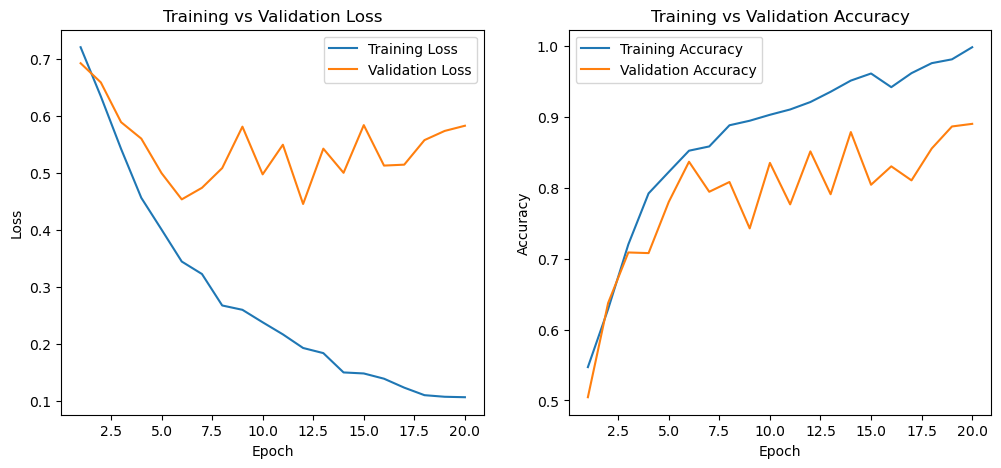

In [8]:
# Plot results
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


In [10]:
from sklearn.metrics import precision_score, recall_score

test_path = "C:/Users/lamim/Desktop/N_Thesis/split_dataset3/test"

# Load the test dataset
test_data = datasets.ImageFolder(root=test_path, transform=transform)

# Create a DataLoader for the test dataset
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

model.eval()

# Initialize tracking variables
test_loss = 0.0
correct_preds = 0
total_preds = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        # Get predictions
        _, preds = torch.max(outputs, 1)
        correct_preds += torch.sum(preds == labels).item()
        total_preds += labels.size(0)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute final loss and accuracy
test_loss /= len(test_loader)
test_accuracy = correct_preds / total_preds

# Compute precision and recall
precision = precision_score(all_labels, all_preds, average='binary')
recall = recall_score(all_labels, all_preds, average='binary')

print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}")


Test Accuracy: 0.8836, Test Loss: 0.6401
Precision: 0.8836, Recall: 0.8836
